In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r'D:\OM\Codes And Projects\Data Science Projects\ML Model Implementations\1) Simple Linear Regression\data\student-mat.csv', sep=';')

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [10]:
numerical_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [11]:
categorical_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [12]:
df.shape

(395, 33)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

| Column         | One-Line Meaning                                           |
| -------------- | ---------------------------------------------------------- |
| **school**     | Student’s school (`GP` or `MS`)                            |
| **sex**        | Gender of the student (`M` or `F`)                         |
| **age**        | Student’s age in years                                     |
| **address**    | Home location type (`U` = urban, `R` = rural)              |
| **famsize**    | Family size (`LE3` ≤ 3 members, `GT3` > 3 members)         |
| **Pstatus**    | Parents’ cohabitation status (`T` = together, `A` = apart) |
| **Medu**       | Mother’s education level (0–4 scale)                       |
| **Fedu**       | Father’s education level (0–4 scale)                       |
| **Mjob**       | Mother’s job type                                          |
| **Fjob**       | Father’s job type                                          |
| **reason**     | Reason for choosing the school                             |
| **guardian**   | Student’s legal guardian                                   |
| **traveltime** | Daily travel time to school (1–4 scale)                    |
| **studytime**  | Weekly study time outside school (1–4 scale)               |
| **failures**   | Number of past class failures                              |
| **schoolsup**  | Extra educational support from school (`yes/no`)           |
| **famsup**     | Family educational support (`yes/no`)                      |
| **paid**       | Paid extra classes (`yes/no`)                              |
| **activities** | Participation in extra-curricular activities (`yes/no`)    |
| **nursery**    | Attended nursery school (`yes/no`)                         |
| **higher**     | Intention to pursue higher education (`yes/no`)            |
| **internet**   | Internet access at home (`yes/no`)                         |
| **romantic**   | In a romantic relationship (`yes/no`)                      |
| **famrel**     | Quality of family relationships (1–5 scale)                |
| **freetime**   | Free time after school (1–5 scale)                         |
| **goout**      | Frequency of going out with friends (1–5 scale)            |
| **Dalc**       | Workday alcohol consumption (1–5 scale)                    |
| **Walc**       | Weekend alcohol consumption (1–5 scale)                    |
| **health**     | Current health status (1–5 scale)                          |
| **absences**   | Number of school absences                                  |
| **G1**         | First period grade (0–20)                                  |
| **G2**         | Second period grade (0–20)                                 |
| **G3**         | **Final grade (Target variable)**                          |


In [14]:
df[['studytime', 'G3']].head()

,studytime,G3
0,2,6
1,2,6
2,2,10
3,3,15
4,2,10


In [15]:
df['studytime'].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

In [16]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

## Data Cleaning

In [17]:
# let we drop first period and second period grade because if we use them regression will be meaningless, because theses columns leak fut. info
df = df.drop(columns=['G1', 'G2'])

In [18]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [19]:
df['studytime'].value_counts().sort_index()

studytime
1    105
2    198
3     65
4     27
Name: count, dtype: int64

In [20]:
df['G3'].value_counts().sort_index()

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

In [21]:
# now student who got zero marks that usually means they dropped out or did not attended exam, so just remove them.
df = df[df['G3'] > 0]

In [22]:
df['G3'].value_counts().sort_index()

G3
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

## Feature Engineering 

In [23]:
df['studytime'].unique()
# now this are not actual hours, they are orinal ranks. 
''' 
If we use it directly:
The model assumes distance between 1→2 is same as 3→4
That’s not true in real hours
So we convert it to approximate hours.
'''

' \nIf we use it directly:\nThe model assumes distance between 1→2 is same as 3→4\nThat’s not true in real hours\nSo we convert it to approximate hours.\n'

In [24]:
# now let we map study time -> approximate hours 
studytime_map = {
    1: 1,
    2: 3.5,
    3: 7.5,
    4: 12
}

df['studytime_hours'] = df['studytime'].map(studytime_map)

| Original | Meaning    | Mapped Hours |
| -------- | ---------- | ------------ |
| 1        | < 2 hours  | 1            |
| 2        | 2–5 hours  | 3.5          |
| 3        | 5–10 hours | 7.5          |
| 4        | > 10 hours | 12           |


In [25]:
df[['studytime', 'studytime_hours']].head()

,studytime,studytime_hours
0,2,3.5
1,2,3.5
2,2,3.5
3,3,7.5
4,2,3.5


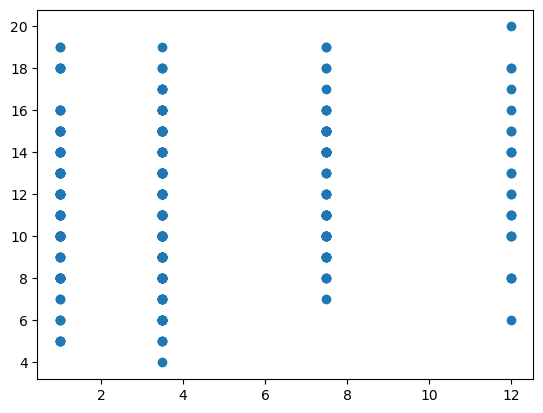

In [ ]:
# Visulization of input feature 
plt.scatter(df['studytime_hours'], df['G3'])
''' input feature (study time) takes only a few discrete values due to its ordinal nature. 
This is acceptable for linear regression. However, the wide variation in final grades 
for the same study time indicates that study time alone is a weak predictor of academic performance, 
which results in low predictive power and a low R² score.
'''

In [ ]:
# lock regression variables.
X=df[['studytime_hours']] # must be in 2 Dimesion
y=df['G3']

In [ ]:
X.describe()

,studytime_hours
count,357.000000
mean,4.088235
std,2.964903
min,1.000000
25%,1.000000
50%,3.500000
75%,3.500000
max,12.000000


In [ ]:
y.describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

#### ✔ Converted ordinal → continuous,
#### ✔ Removed semantic ambiguity,
#### ✔ Prepared clean regression-ready data

In [ ]:
df[['studytime_hours', 'G3']].corr()

,studytime_hours,G3
studytime_hours,1.00000,0.14397
G3,0.14397,1.00000


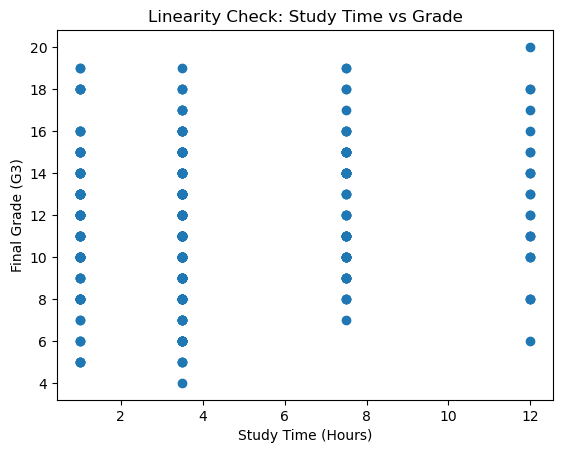

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['studytime_hours'], df['G3'])
plt.xlabel("Study Time (Hours)")
plt.ylabel("Final Grade (G3)")
plt.title("Linearity Check: Study Time vs Grade")
plt.show()


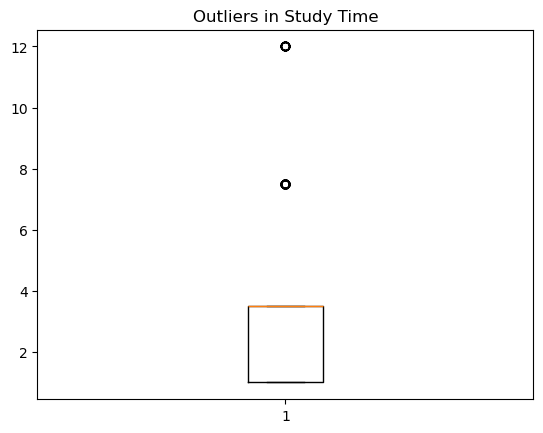

In [ ]:
plt.boxplot(df['studytime_hours'])
plt.title("Outliers in Study Time")
plt.show()

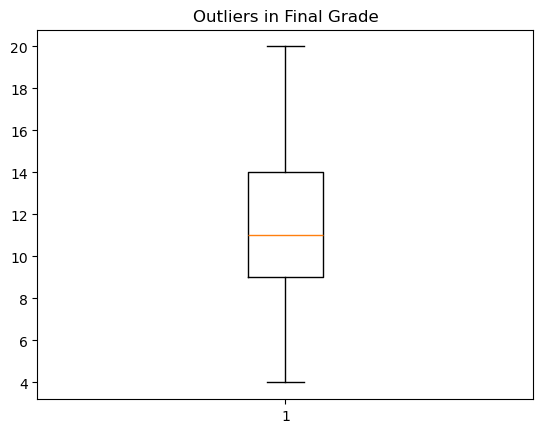

In [ ]:
plt.boxplot(df['G3'])
plt.title("Outliers in Final Grade")
plt.show()

### Model Training
#### Goal: Learn the relationship between study hours and final marks.

In [ ]:
# first let we split data into two part first one is training dataset, and second one is test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# import linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression() # initilize object of liear regression 

In [ ]:
# train the model 
model.fit(X_train, y_train)

# behind the scene model learns G3=m * studytime_hours + c

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
slope = model.coef_[0]
intercept = model.intercept_

print("Slope (Marks per hour):", slope)
print("Intercept:", intercept)

''' 
Interpretation
Slope → average marks gained per additional study hour
Intercept → baseline performance (ability, prior knowledge, etc.)
'''

Slope (Marks per hour): 0.16831605330733765
Intercept: 10.857567893814139


' \nInterpretation\nSlope → average marks gained per additional study hour\nIntercept → baseline performance (ability, prior knowledge, etc.)\n'

In [ ]:
y_pred = model.predict(X_test) # y_test are actual marks and y_pred are predicted marks
print("Predicted marks: ", y_pred)

Predicted marks:  [11.02588395 11.44667408 11.44667408 12.11993829 11.44667408 11.44667408
 11.02588395 11.44667408 11.44667408 11.44667408 11.44667408 11.02588395
 11.44667408 11.44667408 11.02588395 11.44667408 12.11993829 11.44667408
 11.02588395 11.02588395 12.11993829 11.44667408 12.11993829 11.44667408
 11.44667408 11.02588395 11.44667408 11.44667408 11.02588395 11.02588395
 11.44667408 11.44667408 11.44667408 11.02588395 11.02588395 11.02588395
 11.44667408 11.02588395 12.87736053 12.11993829 11.44667408 11.44667408
 12.11993829 12.87736053 11.44667408 11.44667408 11.44667408 11.44667408
 11.44667408 11.02588395 12.87736053 12.87736053 12.11993829 11.02588395
 11.02588395 11.02588395 12.11993829 11.44667408 12.87736053 11.44667408
 12.11993829 11.44667408 11.44667408 12.87736053 11.44667408 11.44667408
 11.44667408 11.44667408 11.02588395 11.44667408 11.02588395 11.44667408]


In [ ]:
y_test

243    12
42     18
319    11
328     9
56     15
       ..
215    15
279    10
93     10
307     8
213     8
Name: G3, Length: 72, dtype: int64

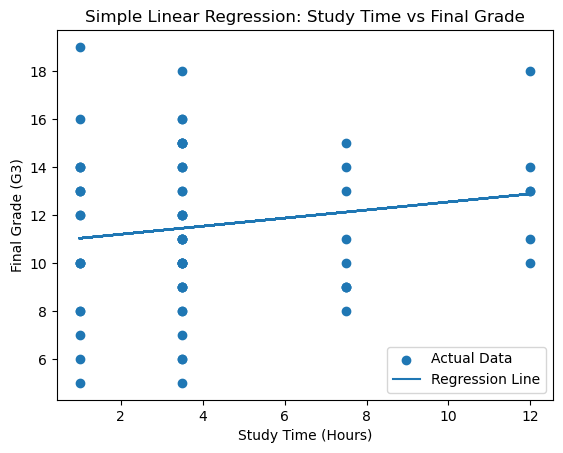

In [ ]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, label='Regression Line')
plt.xlabel("Study Time (Hours)")
plt.ylabel("Final Grade (G3)")
plt.title("Simple Linear Regression: Study Time vs Final Grade")
plt.legend()
plt.show()

#### The regression line shows a slight positive relationship between study time and final grades, but the large scatter of points indicates that study time alone is a weak predictor of academic performance.

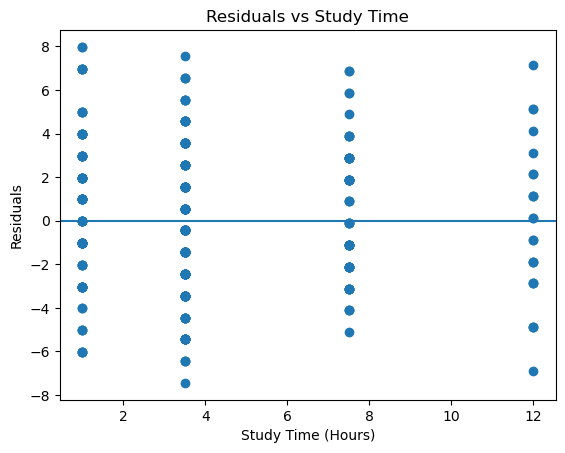

In [ ]:
y_pred_all = model.predict(X)

residuals = y - y_pred_all

plt.scatter(X, residuals)
plt.axhline(0)
plt.xlabel("Study Time (Hours)")
plt.ylabel("Residuals")
plt.title("Residuals vs Study Time")
plt.show()

#### The residuals are randomly scattered around zero with no clear pattern, indicating that the linear regression assumptions are satisfied, although the wide spread suggests that study time alone is a weak predictor of final grades.

## Model Evaluation 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 2.560637585948485
RMSE: 3.0905151583230013
R² Score: 0.00859267635534744


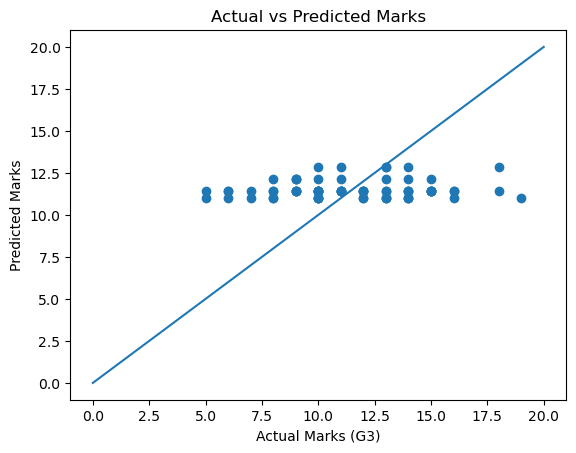

In [ ]:
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Marks (G3)")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.plot([0, 20], [0, 20])  # ideal line
plt.show()

#### The Actual vs Predicted plot shows that the model predicts values close to the mean for most students, indicating that study time alone provides limited information for accurately estimating final grades.

### Conclusion

This project applied Simple Linear Regression to study the relationship between study time and final exam marks (G3) using a real-world dataset. A complete ML workflow was followed, including data cleaning, assumption checks, modeling, and evaluation.

The results show that study time alone is not sufficient to predict academic performance, as reflected by the low R² score. This highlights the limitations of single-feature models on human behavior data. The project is intended for learning purposes, focusing on correct methodology rather than high accuracy, and serves as a foundation for extending to multiple linear regression in future work.